In [1]:
from dynamics import base, creator, model
from dynamics.asset import Asset
from dynamics.tools import Body, kinectic, potentialGrav, rotation, solution
from dynamics.tools.solver import euler, improved_euler, RK2, RK4

In [2]:
simulation = base.Simulation()

body = creator.create('body', Body, **{'mass':1, 'drag_coeff':0, 'length':1})
body = creator.create('body', Body, **{'mass':1, 'drag_coeff':0, 'length':1})
sol = solution.Solution(disp_0=3.0, velo_0=0)
asset = Asset(**{'name': 'mass', 'var_name': 'theta', 'component': body, 'motion_func': rotation, 'solution': sol})
sol_1 = solution.Solution(disp_0=0, velo_0=0)
asset_1 = Asset(**{'name': 'mass', 'var_name': 'theta1', 'component': body, 'motion_func': rotation, 'solution': sol_1, 'connection': asset})

simulation.register('model', model.Model([asset, asset_1]))
simulation.register('solver', RK4)

In [3]:
simulation.model.acceleration()[1]

1.0*theta1ddot(t) + 1.0*thetaddot(t)*cos(theta(t) - theta1(t)) - 1.0*thetadot(t)**2*sin(theta(t) - theta1(t)) - 9.80665*sin(theta1(t))

In [4]:
simulation.set_paramters(time_step=2.5e-3, time_end=1)
simulation.run()

100%|██████████| 400/400 [00:42<00:00,  9.38it/s]


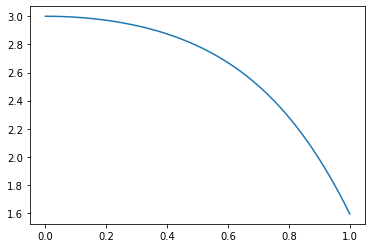

In [5]:
import matplotlib.pyplot as plt 
import numpy as np
solu = simulation.results
plt.plot(solu['time'], solu['theta'])
plt.show()

In [30]:
simulation.results.clear()

In [3]:
import sympy as sp
simulation.model.lagrangian()[0]

-0.25*theta1ddot(t)*cos(theta(t) - theta1(t)) - 0.25*theta1dot(t)**2*sin(theta(t) - theta1(t)) - 0.5*thetaddot(t) - 9.80665*sin(theta(t))

In [4]:
simulation.model.lagrangian()[1]

-0.25*theta1ddot(t) - 0.25*thetaddot(t)*cos(theta(t) - theta1(t)) + 0.25*thetadot(t)**2*sin(theta(t) - theta1(t)) - 4.903325*sin(theta1(t))

In [9]:
import sympy as sp
from sympy.physics.vector import dynamicsymbols

n_asset = 0
# a = simulation.model.lagrangian()[n_asset]
var_name = [simulation.model.asset[0].var_name, simulation.model.asset[1].var_name]
# mass_equ = [a.coeff(dynamicsymbols(var_name[0]+'ddot')), a.coeff(dynamicsymbols(var_name[1]+'ddot'))] 
# react_equ = sp.simplify(a.subs(dynamicsymbols(var_name[0]+'ddot'), 0).subs(dynamicsymbols(var_name[1]+'ddot'), 0))

In [6]:
react_equ

-0.25*theta1dot(t)**2*sin(theta(t) - theta1(t)) - 9.80665*sin(theta(t))

In [7]:
mass_equ

[-0.500000000000000, -0.25*cos(theta(t) - theta1(t))]

In [16]:
n_asset = 1
a = simulation.model.lagrangian()[n_asset]
var_name = [simulation.model.asset[0].var_name, simulation.model.asset[1].var_name]
mass_equ = [a.coeff(dynamicsymbols(var_name[0]+'ddot')), a.coeff(dynamicsymbols(var_name[1]+'ddot'))] 
react_equ = sp.simplify(a.subs(dynamicsymbols(var_name[0]+'ddot'), 0).subs(dynamicsymbols(var_name[1]+'ddot'), 0))

In [17]:
react_equ

1.0*thetadot(t)**2*sin(theta(t) - theta1(t)) - 9.80665*sin(theta1(t))

In [18]:
mass_equ

[-1.0*cos(theta(t) - theta1(t)), -1.00000000000000]

In [ ]:
x1 = sp.MatrixSymbol('x1', 2, 2)
x1.subs

In [10]:
a = simulation.model.acceleration()[0]
b = simulation.model.acceleration()[1]

p = sp.Matrix([[a.coeff(dynamicsymbols(var_name[0]+'ddot')), a.coeff(dynamicsymbols(var_name[1]+'ddot'))], [b.coeff(dynamicsymbols(var_name[0]+'ddot')), b.coeff(dynamicsymbols(var_name[1]+'ddot'))] ])

q =sp.Matrix([sp.simplify(a.subs(dynamicsymbols(var_name[0]+'ddot'), 0).subs(dynamicsymbols(var_name[1]+'ddot'), 0)), sp.simplify(b.subs(dynamicsymbols(var_name[0]+'ddot'), 0).subs(dynamicsymbols(var_name[1]+'ddot'), 0))])

In [11]:
p

Matrix([
[                           -0.5, -0.25*cos(theta(t) - theta1(t))],
[-0.25*cos(theta(t) - theta1(t)),                           -0.25]])

In [12]:
p.inv()

Matrix([
[                       0.125/(0.03125*cos(theta(t) - theta1(t))**2 - 0.0625), -0.125*cos(theta(t) - theta1(t))/(0.03125*cos(theta(t) - theta1(t))**2 - 0.0625)],
[0.25*cos(theta(t) - theta1(t))/(0.125 - 0.0625*cos(theta(t) - theta1(t))**2),                               -0.5/(0.125 - 0.0625*cos(theta(t) - theta1(t))**2)]])

In [13]:
q

Matrix([
[-0.25*theta1dot(t)**2*sin(theta(t) - theta1(t)) - 9.80665*sin(theta(t))],
[0.25*thetadot(t)**2*sin(theta(t) - theta1(t)) - 4.903325*sin(theta1(t))]])

In [14]:
acc=p.inv()*q

In [17]:
acc

Matrix([
[-(0.03125*theta1dot(t)**2*sin(theta(t) - theta1(t)) + 0.015625*thetadot(t)**2*sin(2*theta(t) - 2*theta1(t)) + 0.3064578125*sin(theta(t) - 2*theta1(t)) + 0.9193734375*sin(theta(t)))/(0.03125*cos(theta(t) - theta1(t))**2 - 0.0625)],
[         (0.03125*theta1dot(t)**2*sin(2*theta(t) - 2*theta1(t)) + 0.125*thetadot(t)**2*sin(theta(t) - theta1(t)) + 1.22583125*sin(2*theta(t) - theta1(t)) - 1.22583125*sin(theta1(t)))/(0.0625*cos(theta(t) - theta1(t))**2 - 0.125)]])

In [16]:
acc.simplify()

In [12]:
acc[0].simplify()

-(1.0*thetadot(t)**2*sin(2*theta(t)) + 39.2266*sin(theta(t)))/(2.0*cos(theta(t))**2 - 4.0)

In [13]:
acc[1].simplify()

(0.5*theta1dot(t)**2*sin(2*theta(t) - 2*theta1(t)) + 2.0*thetadot(t)**2*sin(theta(t) - theta1(t)) + 9.80665*sin(2*theta(t) - theta1(t)) - 9.80665*sin(theta1(t)))/(1.0*cos(theta(t) - theta1(t))**2 - 2.0)

In [27]:
theta = [3]; thetadot = [0]; theta1 = [1.2]; theta1dot = [0]; time = [0]; dt = 2.5e-3; acc_func = [acc[0].simplify(), acc[1].simplify()]
n_iter = 10000

from tqdm import tqdm
for i in tqdm(range(n_iter)):
# for i in range(n_iter):
    # print('start', i)
    for j, accel in enumerate(acc_func):
        if j == 0:
            accele = accel.subs(dynamicsymbols('theta1'), theta1[i]).subs(dynamicsymbols('theta1dot'), theta1dot[i])
            s, v, t = RK4(accele, theta[i], thetadot[i], time[i], dynamicsymbols('theta'), dynamicsymbols('thetadot'), dt)
            s, v = s.evalf(), v.evalf()

            # print(s)
            # print(v)
            theta.append(s)
            thetadot.append(v)

        else:
            accele = accel.subs(dynamicsymbols('theta'), theta[i]).subs(dynamicsymbols('thetadot'), thetadot[i])
            s, v, t = RK4(accele, theta1[i], theta1dot[i], time[i], dynamicsymbols('theta1'), dynamicsymbols('theta1dot'), dt)
            s, v = s.evalf(), v.evalf()

            # print(s)
            # print(v)
            theta1.append(s)
            theta1dot.append(v)

    time.append(t)
    # print('end',i)

100%|██████████| 10000/10000 [17:20<00:00,  9.61it/s]


In [25]:
import numpy as np
mass_x, mass_y = simulation.model.asset[0].motion
mass_x = sp.lambdify(dynamicsymbols('theta'), mass_x, 'numpy')
mass_y = sp.lambdify(dynamicsymbols('theta'), mass_y, 'numpy')

mass1_x, mass1_y = simulation.model.asset[1].motion
mass1_x = sp.lambdify(dynamicsymbols('theta1'), mass1_x, 'numpy')
mass1_y = sp.lambdify(dynamicsymbols('theta1'), mass1_y, 'numpy')



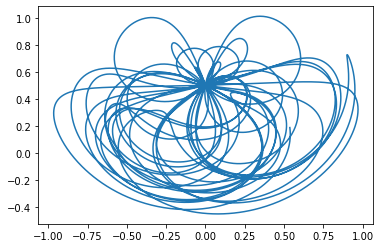

In [28]:
import matplotlib.pyplot as plt 
import numpy as np
# solu = simulation.results
plt.plot(mass_x(np.array(theta, dtype=np.float64))+mass1_x(np.array(theta1, dtype=np.float64)), 1.5 - mass_y(np.array(theta, dtype=np.float64))-mass1_y(np.array(theta1, dtype=np.float64)))
plt.show()

In [22]:
def RK4(f, s0, v0, t0, s_sym, v_sym, dt):
    """Numerical integrator using RK4."""
    k1_v = f.subs(s_sym, s0).subs(v_sym, v0) * dt
    k1_s = v0 * dt

    k1_v, k1_s = k1_v.evalf(), k1_s

    k2_v = f.subs(s_sym, s0 + k1_s/2).subs(v_sym, v0 + k1_v/2) * dt
    k2_s = (v0 + k1_v/2) * dt

    k2_v, k2_s = k2_v.evalf(), k2_s

    k3_v = f.subs(s_sym, s0 + k2_s/2).subs(v_sym, v0 + k2_v/2) * dt
    k3_s = (v0 + k2_v/2) * dt

    k3_v, k3_s = k3_v.evalf(), k3_s

    k4_v = f.subs(s_sym, s0 + k3_s).subs(v_sym, v0 + k3_v) * dt
    k4_s = (v0 + k3_v) * dt

    k4_v, k4_s = k4_v.evalf(), k4_s

    s = s0 + (k1_s + 2*k2_s + 2*k3_s + k4_s)/6 + dt**5
    v = v0 + (k1_v + 2*k2_v + 2*k3_v + k4_v)/6 + dt**5
    t = t0 + dt

    return s, v, t